In [95]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click aquí para ver el código."></form>''')

# Robótica: Control PID aplicado a un Seguidor de Línea
---

## Mecatrónica
---
* Mecánica
* Electrónica
* Informática

## Motivación
---
* [Competencia Internacional de Robótica - GRS - UTN - Bahía Blanca](https://www.grsbahiablanca.com.ar/ "GRS Bahia Blanca")
* [Competencia de Robótica y Hackathon - DIT - UNPSJB - Trelew ](https://es-la.facebook.com/pg/DITUNPSJB/photos/?tab=album&album_id=1624692790950430 "DIT Trelew")
* [Intercolegiales de las Escuelas 703, 728, 724, 748, 702](https://www.youtube.com/user/ROBOTICAPOLI702/videos/ "E.S.E.T.P.N°702")

## Categorías
---
* Sumo
* MiniSumo
* Seguidores de Línea - Carreras
* Laberinto
* Fútbol de robots

# Seguidor de Línea
---

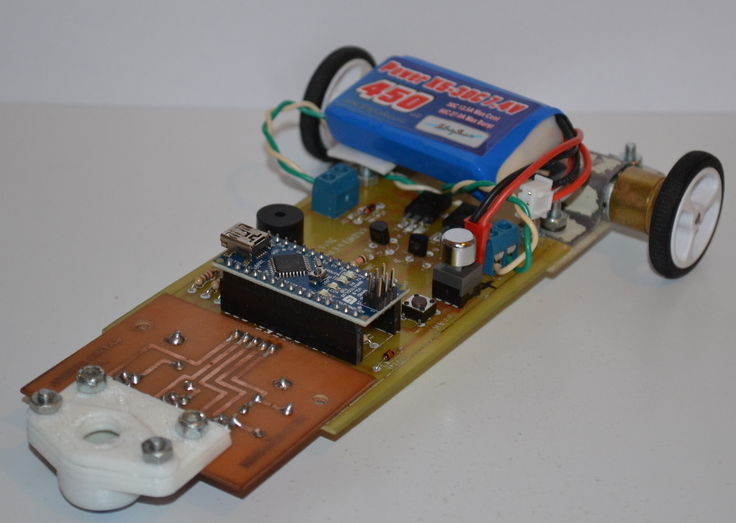

In [96]:
from IPython.display import Image
Image(filename='Images/TUX.png',width=600)

## Arquitectura centralizada
---

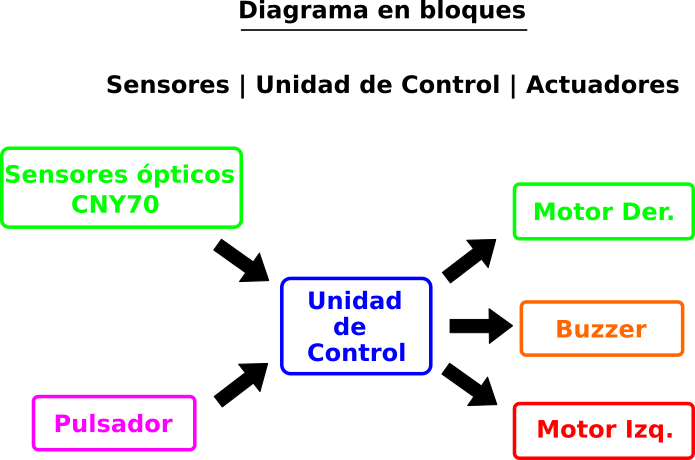

In [97]:
from IPython.display import Image
Image(filename='Images/topologia.png',width=600)

## Sensores
---
* Sensores ópticos CNY70
  * Digital (0-1)
  * Analógica (0-1023)
  * [Medir tiempos en un circuito RC](https://www.pololu.com/docs/0J13/2 "Pololu QTRC")
* Pulsador de largada

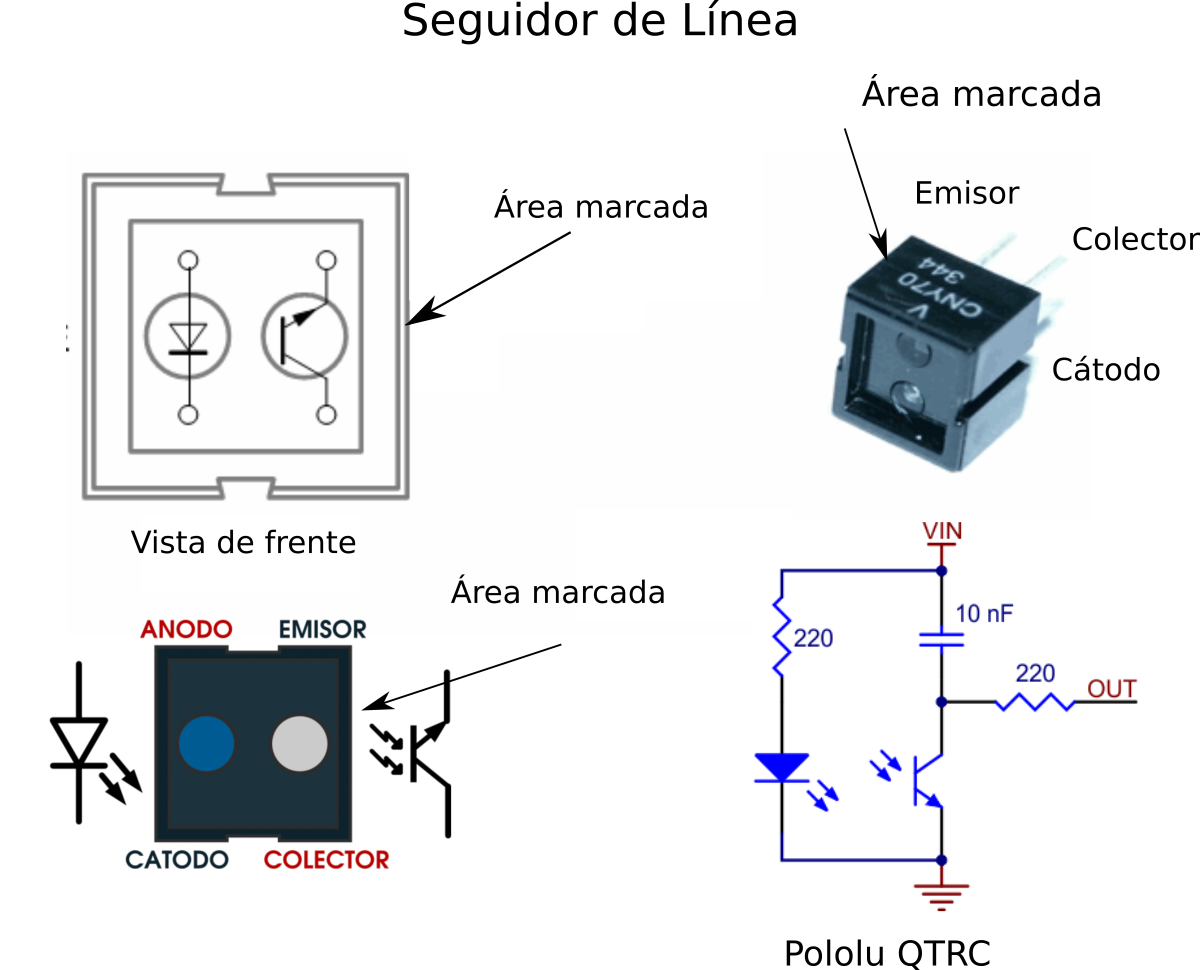

In [98]:
from IPython.display import Image
Image(filename='Images/CNY70.png',width=500)

## Unidad de Control
---
* Arduino Nano

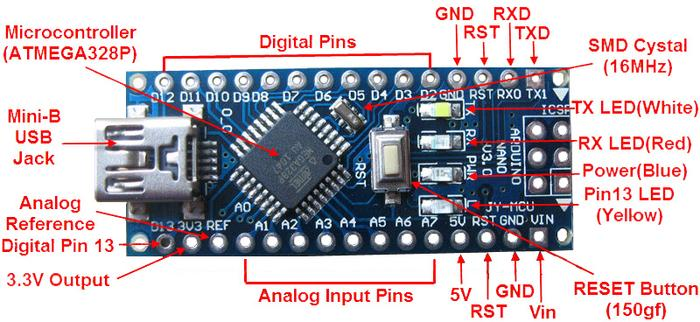

In [99]:
from IPython.display import Image
Image(filename='Images/arduinonano.jpg',width=500)

## Actuadores
---
* [Motorreductores micrometal 35:1](https://www.pololu.com/product/1597 "Pololu Motores Micrometal")
* Buzzer

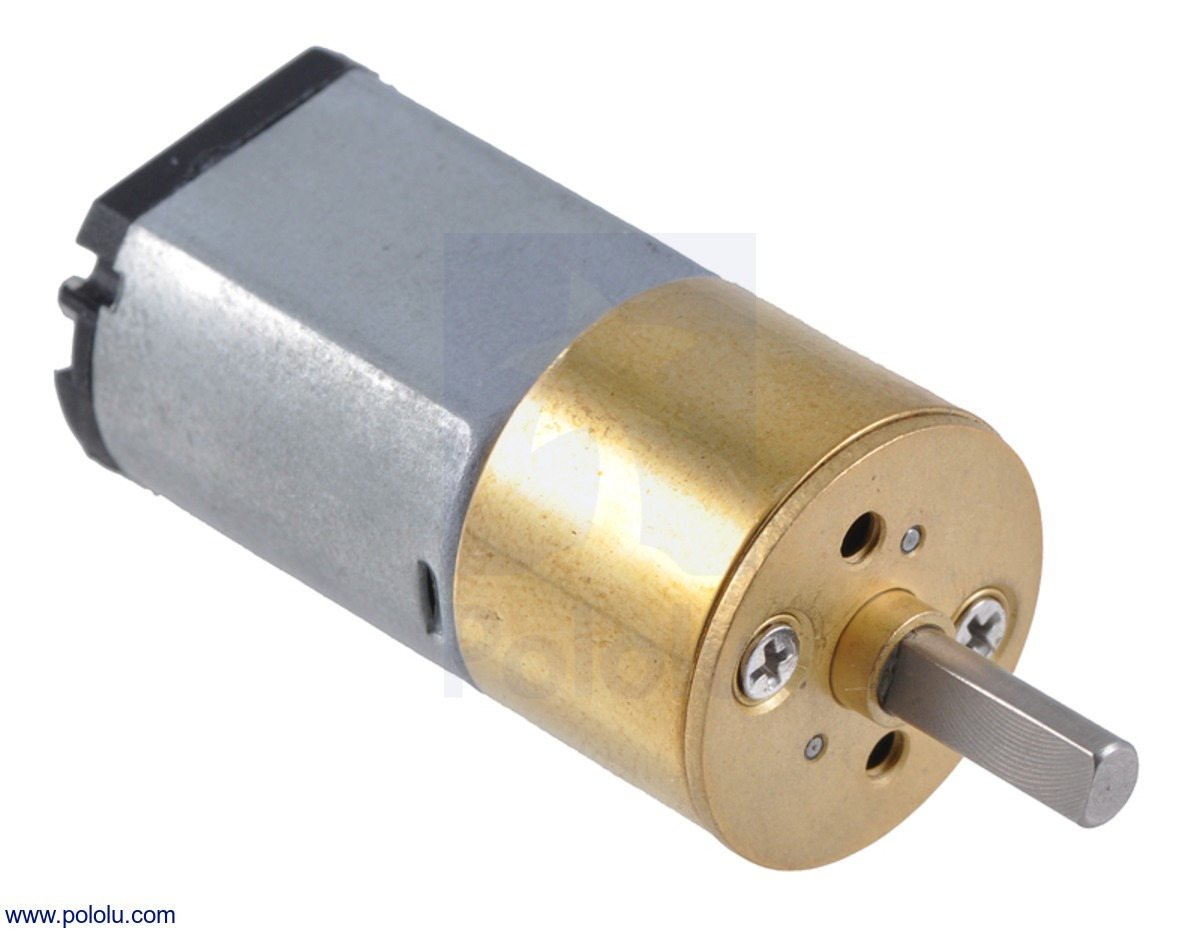

In [100]:
from IPython.display import Image
Image(filename='Images/motor.jpg',width=200)

## Batería
---
* Litio Polimero 7.4V / 450mA

## Diagrama en bloques del código fuente
---

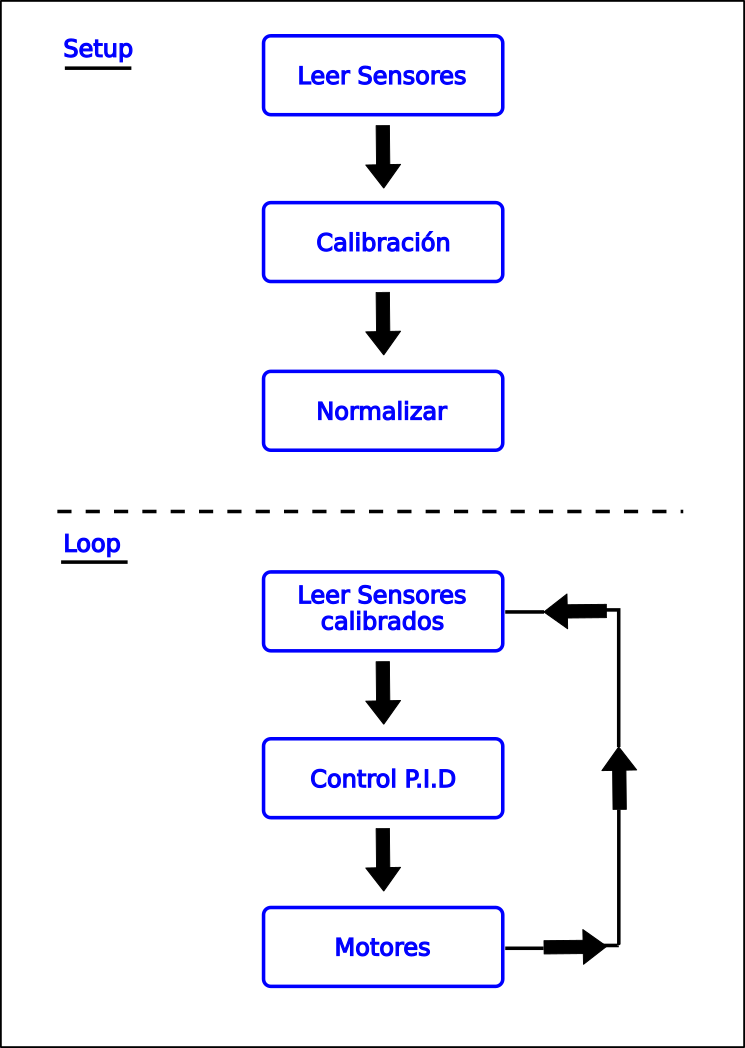

In [101]:
from IPython.display import Image
Image(filename='Images/codigo_diagrama_en_bloques.png',width=600)

## Leer Sensores
---

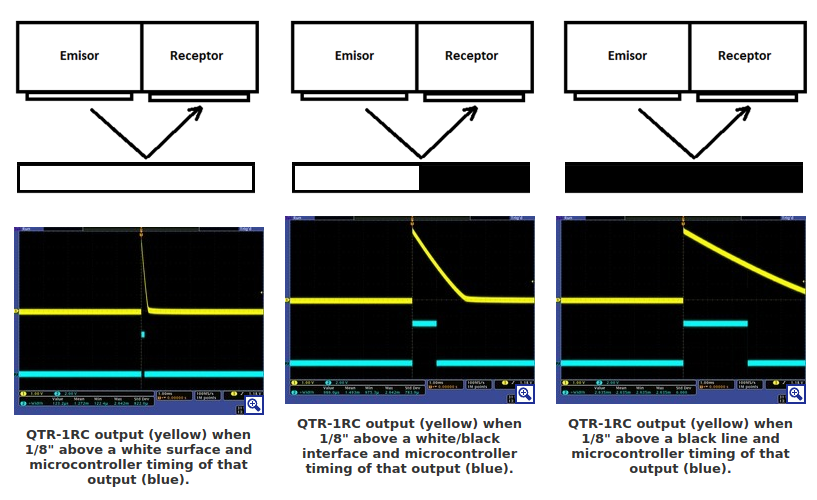

In [102]:
from IPython.display import Image
Image(filename='Images/reflexion_CNY70.png',width=800)

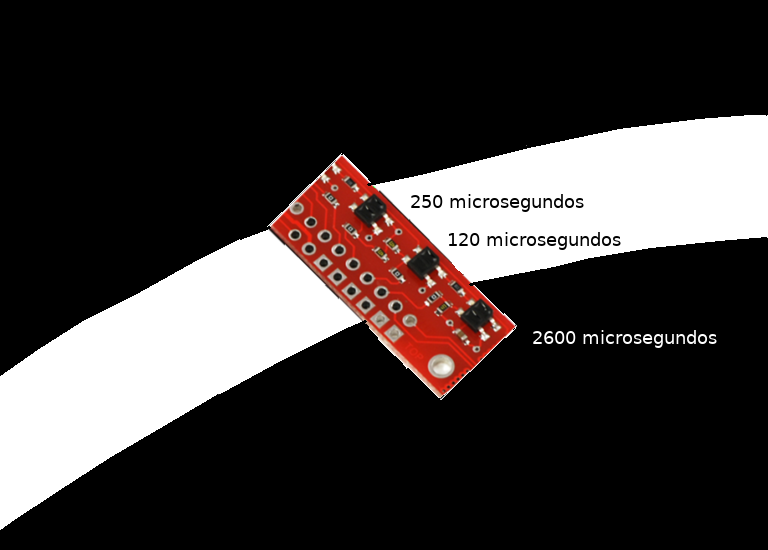

In [103]:
from IPython.display import Image
Image(filename='Images/reflexion.png',width=600)

In [104]:
from bokeh.io import push_notebook, show, output_notebook
from bokeh.plotting import figure
output_notebook()



Loading BokehJS ...

In [105]:
sensores = ['Sensor1', 'Sensor2', 'Sensor3']

p = figure(x_range=sensores, plot_height=400, title="Reflexión de Sensores",
           toolbar_location=None, tools="")

p.vbar(x=sensores, top=[250, 120, 2600], width=0.25)

p.xgrid.grid_line_color = None
p.y_range.start = 0

show(p)

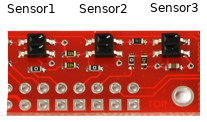

In [106]:
from IPython.display import Image
Image(filename='Images/reflexion_de_sensores2.png',width=250)

##  Calibración y Normalización de los sensores
---

In [107]:
import pandas as pd

In [108]:
lis_of_list= [["Sensor1", 250, 52, 948],
 ["Sensor2", 120, 0, 1000],
 ["Sensor3", 2600, 1000, 0]]

In [109]:
labels2=['', 'Lectura Sensor', 'Normalizados', 'Inversión']
df2 = pd.DataFrame.from_records(lis_of_list, columns=labels2)
df2

,,Lectura Sensor,Normalizados,Inversión
0,Sensor1,250,52,948
1,Sensor2,120,0,1000
2,Sensor3,2600,1000,0


## Curva de Respuesta de los sensores
---
* Ejemplo para 3 sensores

In [110]:
x = [0 ,1, 2]
colores=["red","orange","blue","green","yellow","pink","navy","firebrick","cyan","magenta","olive","#164c71","#7c1b65"]
lista=[948, 1000, 0]

p = figure(title="Curva de Respuesta de un Array de Sensores",plot_width=900)
p.title.align = "center"
p.title.text_color = "blue"
p.title.text_font = "times"
p.title.text_font_style = "italic"
p.title.text_font_size = "20px"

p.left[0].formatter.use_scientific = False

p.line(x, lista,legend="Array 3 Sensores", line_color=colores[3], line_width=2)

p.xaxis.axis_label = 'Sensores'
p.yaxis.axis_label = 'Valor invertido'

show(p)

* Ejemplo para 8 sensores

In [111]:
x = [0, 1, 2, 3, 4, 5, 6, 7]
colores=["red","orange","blue","green","yellow","pink","navy","firebrick","cyan","magenta","olive","#164c71","#7c1b65"]
lista=[0, 0, 218, 804, 902, 316, 0, 0]

p = figure(title="Curva de Respuesta de un Array de Sensores",plot_width=900)
p.title.align = "center"
p.title.text_color = "blue"
p.title.text_font = "times"
p.title.text_font_style = "italic"
p.title.text_font_size = "20px"

p.left[0].formatter.use_scientific = False

p.line(x, lista,legend="Array 8 Sensores", line_color=colores[7], line_width=2)

p.xaxis.axis_label = 'Sensores'
p.yaxis.axis_label = 'Valor invertido'

show(p)

## Estimación de la posición a través del promedio ponderado
---

In [112]:
from IPython.display import Latex
Latex(r"""
\begin{eqnarray}
\left.\begin{aligned}
& Posición = 1000*\frac{\sum_{i=0}^{n}x_{i}*y_{i}}{\sum_{i=0}^{n}y_{i}} \\
& x_{i}: Número\hspace{0.2cm}de\hspace{0.2cm}Sensor \\
& y_{i}: Lectura\hspace{0.2cm}del\hspace{0.2cm}Sensor \\
& Posición = \frac{(0*valor0 + 1000*valor1 + 2000*valor2 + ...)}{(valor0 + valor1 + valor2 +...)}
\end{aligned}\right.
\end{eqnarray}""")

<IPython.core.display.Latex object>

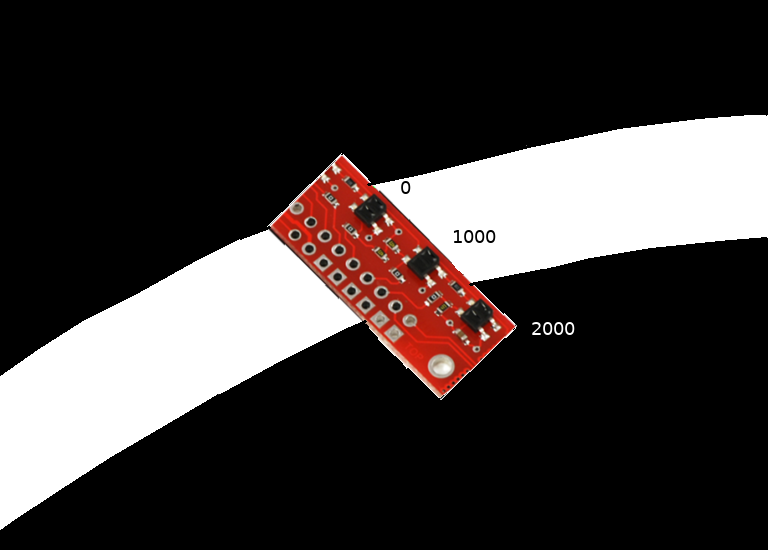

In [113]:
from IPython.display import Image
Image(filename='Images/posicion.png',width=500)

## Calculamos el error
---

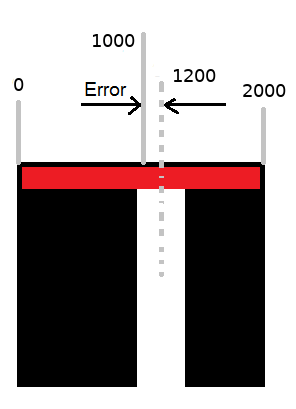

In [114]:
from IPython.display import Image
Image(filename='Images/10.png',width=200)

In [115]:
from IPython.display import Latex
Latex(r"""\begin{eqnarray}
Error = Posición\hspace{0.2cm}Actual - Setpoint
\end{eqnarray}""")

<IPython.core.display.Latex object>

## Control PID
---

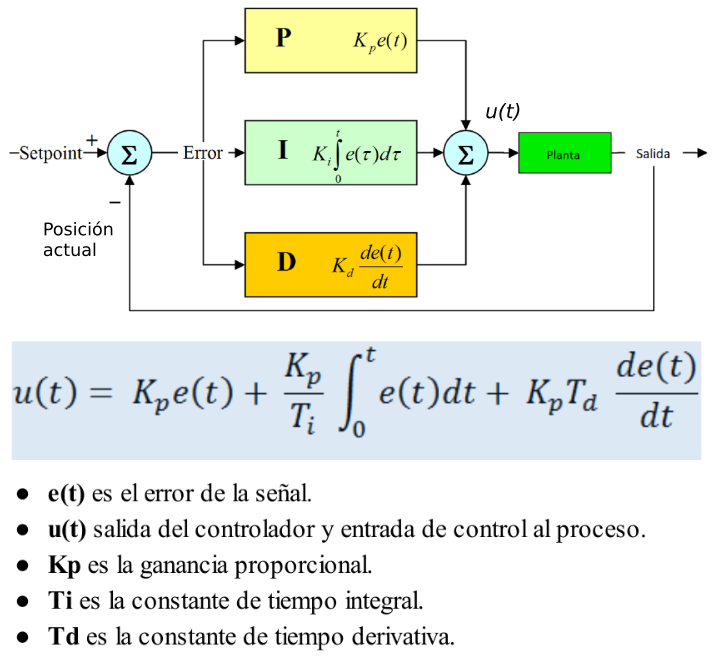

In [116]:
from IPython.display import Image
Image(filename='Images/PID.png',width=600)

## Implementación del código - Librería QTRSensors.h
---
* [Librería Arduino para los Sensores Reflectivos QTR de Pololu](https://www.pololu.com/docs/0J19/all#3 "Pololu QTRSensors")

```c++

#include <QTRSensors.h>
 
// create an object for your type of sensor (RC or Analog)
// in this example we have three sensors on analog inputs 0 - 2, a.k.a. digital pins 14 - 16
QTRSensorsRC qtr((char[]) {14, 15, 16}, 3);
// QTRSensorsA qtr((char[]) {0, 1, 2}, 3);
 
void setup()
{
  // optional: wait for some input from the user, such as  a button press
 
  // then start calibration phase and move the sensors over both
  // reflectance extremes they will encounter in your application:
  int i;
  for (i = 0; i < 250; i++)  // make the calibration take about 5 seconds
  {
    qtr.calibrate();
    delay(20);
  }
 
  // optional: signal that the calibration phase is now over and wait for further
  // input from the user, such as a button press
}

int lastError = 0;
int setpoint = 1000;

void loop()
{
  unsigned int sensors[3];
  // get calibrated sensor values returned in the sensors array, along with the line position
  // position will range from 0 to 2000, with 1000 corresponding to the line over the middle 
  // sensor
  int position = qtr.readLine(sensors);
 
  // compute our "error" from the line position.  We will make it so that the error is zero when
  // the middle sensor is over the line, because this is our goal.  Error will range from
  // -1000 to +1000.  If we have sensor 0 on the left and sensor 2 on the right,  a reading of 
  // -1000 means that we see the line on the left and a reading of +1000 means we see the 
  // line on the right.
  int error = position - setpoint;
 
  // set the motor speed based on proportional and derivative PID terms
  // KP is the a floating-point proportional constant (maybe start with a value around 0.1)
  // KD is the floating-point derivative constant (maybe start with a value around 5)
  // note that when doing PID, it's very important you get your signs right, or else the
  // control loop will be unstable
  int motorSpeed = KP * error + KD * (error - lastError);
  lastError = error;
 
  // M1 and M2 are base motor speeds.  That is to say, they are the speeds the motors should
  // spin at if you are perfectly on the line with no error.  If your motors are well matched,
  // M1 and M2 will be equal.  When you start testing your PID loop, it might help to start with
  // small values for M1 and M2.  You can then increase the speed as you fine-tune your
  // PID constants KP and KD.
  int m1Speed = M1 + motorSpeed;
  int m2Speed = M2 - motorSpeed;
 
  // it might help to keep the speeds positive (this is optional)
  // note that you might want to add a similiar line to keep the speeds from exceeding
  // any maximum allowed value
  if (m1Speed < 0)
    m1Speed = 0;
  if (m2Speed < 0)
    m2Speed = 0;
 
  // set motor speeds using the two motor speed variables above
}
```

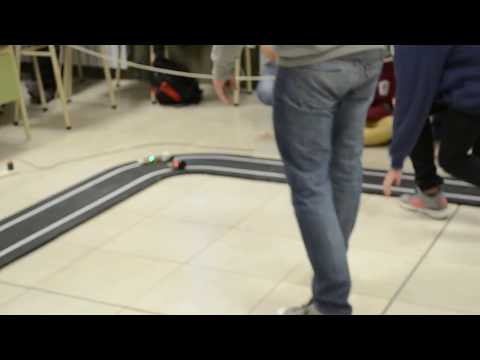

In [117]:
from IPython.display import YouTubeVideo
# Video credit: RoboticaPoli702
YouTubeVideo('3YX7NwPJCRk')

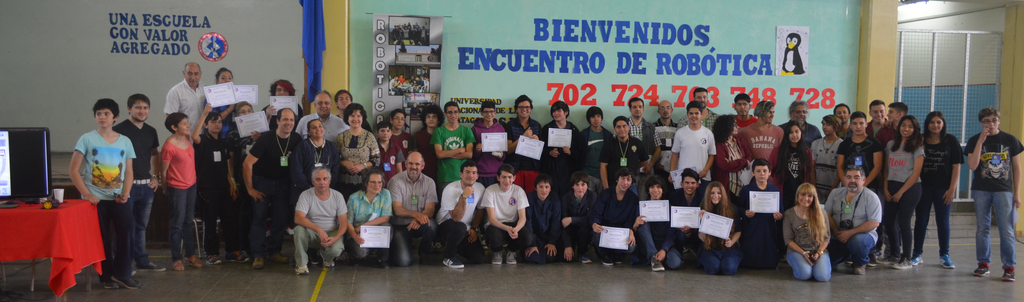

In [118]:
from IPython.display import Image
Image(filename='Images/todos.png',width=900)

## Muchas Gracias...